# Introduction
The E-commerce has become more and more popular these days, people spend more and more time online for shopping, reading critics and looking for new information. Reviews of others play a significant roles of people making their own decision. For example, if you have read a restaurant review before visiting, chances are you will decide not to go for dining if you see the reviews are bad, same logics apply to online shopping as well, people tend to buy products that have more positive reviews from others. Sentiment analysis thus becomes critical for companies that highly depends their sales on human online behaviors.

This project is to build a simple model to identify people's emotion when writing the review

In [101]:
# importing modules and packages for the project
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [85]:
# importing data, we will first use the yelp data provided
yelp_raw = pd.read_csv('data/yelp_labelled.txt', sep='\t', header=None, names=['reviews', 'sentiment'])
yelp_raw.head()

,reviews,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [86]:
# showing some examples that people left bad reviews and try to find some patterns
yelp_raw[yelp_raw['sentiment']==0].sample(10)

,reviews,sentiment
735,"Probably never coming back, and wouldn't recom...",0
541,We waited for thirty minutes to be seated (alt...,0
705,I work in the hospitality industry in Paradise...,0
819,This place should honestly be blown up.,0
584,After I pulled up my car I waited for another ...,0
291,Just don't know why they were so slow.,0
937,Don't bother coming here.,0
121,"Worst service to boot, but that is the least o...",0
975,What happened next was pretty....off putting.,0
611,I checked out this place a couple years ago an...,0


In [120]:
# creating feature that has binary value whether the review contains the word or not, first list some bad words
# that are common in bad reviews
bad_words = ['bad', 'worse', 'don\'t', 'slow', 'avoid', 'vain', 'terrible', 'poor', 'mediocre',
            'hasn\'t', 'sick', 'gross', 'late', 'suck', 'off', 'waste', 'disappoint', 'never', 'away',
            'zero', 'rather', 'neither', 'but', 'wrong', 'no', 'eew', 'dont', 'disgust', 'didn\'t',
            'won\'t', 'worst', 'should', 'fail', 'vain', 'vomit', 'wouldn\'t', 'wasn\'t', 'rude', 'hate', 'anymore',
            'tasteless', 'only']
X_train = pd.DataFrame()
for word in bad_words:
    X_train[word] = yelp_raw['reviews'].str.contains(word, case=False)
X_train.shape

(1000, 41)

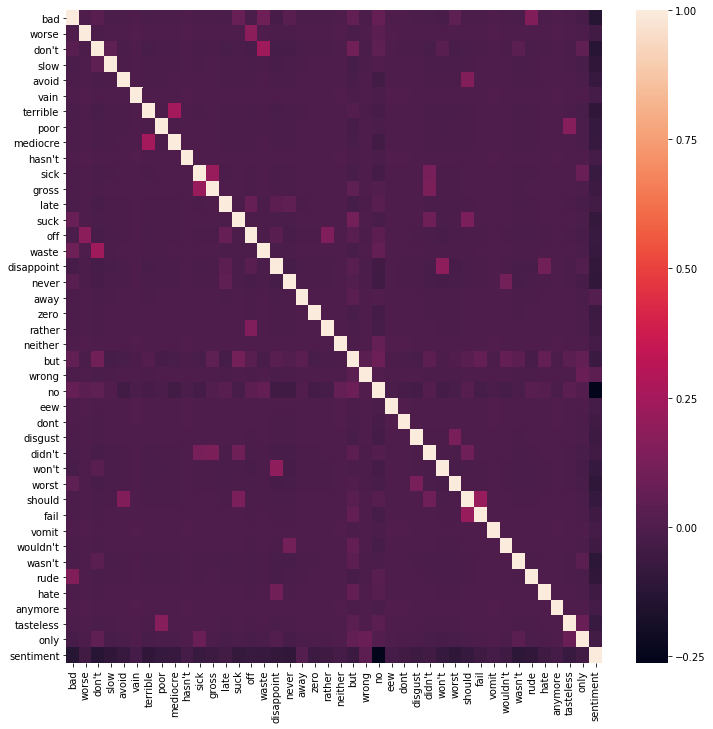

In [121]:
# plot the heatmap to show the correlation between each bad words to see if there are any highly correlated variables
# that we need to get rid of before fitting our model, since the assumption of Naive Bayes is each feature/variable 
# is independent to each other
fig, ax = plt.subplots(1,1,figsize=(12,12))
sns.heatmap(pd.concat([X_train, yelp_raw['sentiment']], axis=1).corr())
plt.show()

In [122]:
# since the data is binary, we could implement the Bernoulli classifier

# Instantiate the model
bnb = BernoulliNB()

# fitting the model with the data
y_train = yelp_raw['sentiment']
bnb.fit(X_train, y_train)

# predict the model using the original data
y_predict = bnb.predict(X_train)

# calculate accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score: {}'.format(accuracy_score(y_train, y_predict)))

Accuracy score: 0.774


In [100]:
# show the false positive of the model, that is, model predicts good review but it is actually bad 
# will retrain the model by adding some other features in the bad_words
yelp_raw['predict'] = y_predict
yelp_raw[(yelp_raw['sentiment'] == False) & (yelp_raw['predict'] == True)].sample(10)

,reviews,sentiment,predict
944,The cashew cream sauce was bland and the veget...,0,1
159,"Unfortunately, we must have hit the bakery on ...",0,1
828,The service here is fair at best.,0,1
830,Do yourself a favor and stay away from this dish.,0,1
971,The ambiance isn't much better.,0,1
183,It was probably dirt.,0,1
791,Once your food arrives it's meh.,0,1
541,We waited for thirty minutes to be seated (alt...,0,1
371,They dropped more than the ball.,0,1
634,Ordered burger rare came in we'll done.,0,1


In [105]:
# try the trained model on the other dataset
amazon_raw = pd.read_csv('data/amazon_cells_labelled.txt', sep='\t', header=None, names=['reviews', 'sentiment'])
amazon_raw.head()

,reviews,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [106]:
# use the same set of bad_words to train amazon data
bad_words = ['not', 'bad', 'worse', 'don\'t', 'slow', 'avoid', 'vain', 'terrible', 'poor', 'mediocre',
            'hasn\'t', 'sick', 'gross', 'late', 'suck', 'off', 'waste', 'disappoint', 'never', 'away', 'borning',
            'zero', 'rather', 'neither', 'but', 'wrong', 'no', 'eew', 'dont', 'disgust', 'refuse', 'didn\'t',
            'won\'t', 'worst', 'should', 'fail', 'vain', 'vomit', 'wouldn\'t', 'wasn\'t', 'rude', 'hate', 'anymore',
            'tasteless', 'only']
X_train = pd.DataFrame()
for word in bad_words:
    X_train[word] = amazon_raw['reviews'].str.contains(word, case=False)
X_train.shape

(1000, 44)

In [107]:
# Instantiate the model
bnb = BernoulliNB()

# fitting the model with the data
y_train = amazon_raw['sentiment']
bnb.fit(X_train, y_train)

# predict the model using the original data
y_predict = bnb.predict(X_train)

# calculate accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score: {}'.format(accuracy_score(y_train, y_predict)))

Accuracy score: 0.72


In [108]:
# try the model on the third dataset
imdb_raw = pd.read_csv('data/imdb_labelled.txt', sep='\t', header=None, names=['reviews', 'sentiment'])
imdb_raw.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [109]:
# use the same set of bad_words to train imdb data
bad_words = ['not', 'bad', 'worse', 'don\'t', 'slow', 'avoid', 'vain', 'terrible', 'poor', 'mediocre',
            'hasn\'t', 'sick', 'gross', 'late', 'suck', 'off', 'waste', 'disappoint', 'never', 'away', 'borning',
            'zero', 'rather', 'neither', 'but', 'wrong', 'no', 'eew', 'dont', 'disgust', 'refuse', 'didn\'t',
            'won\'t', 'worst', 'should', 'fail', 'vain', 'vomit', 'wouldn\'t', 'wasn\'t', 'rude', 'hate', 'anymore',
            'tasteless', 'only']
X_train = pd.DataFrame()
for word in bad_words:
    X_train[word] = imdb_raw['reviews'].str.contains(word, case=False)
X_train.shape

(748, 44)

In [110]:
# Instantiate the model
bnb = BernoulliNB()

# fitting the model with the data
y_train = imdb_raw['sentiment']
bnb.fit(X_train, y_train)

# predict the model using the original data
y_predict = bnb.predict(X_train)

# calculate accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score: {}'.format(accuracy_score(y_train, y_predict)))

Accuracy score: 0.7152406417112299


# Conclusion
Based on the first training set, we trained the entire model from yelp data and the accuracy score is 0.774, this could be further improved if we add more bad words that might correctly identify the bad reviews, the algorithms we apply is Naive Bayes and we applied the Bernoulli version since each features have binary-value. As we can see, when applying the same algorithms on a different dataset, we could still get 0.72 accuracy on Amazon and 0.715 accuracy on imdb, this is slightly lower than our yelp dataset. The reason could be yelp is mainly focus on restaurant review, the negative words such as "not delicious", "disgust" coudl not actually apply on other fields. This may restrict our prediction ability. But general words like "bad", "not" could be applied in any field, thus we are able to keep the accuracy score in a relatively high level.